In [1]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder,OrdinalEncoder, LabelEncoder, LabelBinarizer
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf

2025-05-26 09:49:33.818745: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-26 09:49:33.821562: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-26 09:49:33.830271: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748245773.844809    5149 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748245773.849269    5149 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1748245773.860419    5149 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

In [2]:
df = pd.read_csv('dataset.csv')
df.columns = [c.strip().lower() for c in df.columns]
# 2. Strip whitespace from column names
df.columns = df.columns.str.strip()

# 3. Trim whitespace in all string cells
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# 4. Convert empty strings to NaN (optional)
df.replace('', np.nan, inplace=True)
df.totalcharges = pd.to_numeric(df.totalcharges)
# 5. Drop duplicate rows
df.drop_duplicates(inplace=True)

# 6. Drop rows with missing values
df.dropna(inplace=True)


/tmp/ipykernel_5149/4209060789.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


In [3]:
pd.set_option('display.max_columns', None)
df.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
for elem in df.columns:
    print(f"pour la colonne {elem} le nombre d'élement est de {len(df[elem].unique())}")

pour la colonne customerid le nombre d'élement est de 7032
pour la colonne gender le nombre d'élement est de 2
pour la colonne seniorcitizen le nombre d'élement est de 2
pour la colonne partner le nombre d'élement est de 2
pour la colonne dependents le nombre d'élement est de 2
pour la colonne tenure le nombre d'élement est de 72
pour la colonne phoneservice le nombre d'élement est de 2
pour la colonne multiplelines le nombre d'élement est de 3
pour la colonne internetservice le nombre d'élement est de 3
pour la colonne onlinesecurity le nombre d'élement est de 3
pour la colonne onlinebackup le nombre d'élement est de 3
pour la colonne deviceprotection le nombre d'élement est de 3
pour la colonne techsupport le nombre d'élement est de 3
pour la colonne streamingtv le nombre d'élement est de 3
pour la colonne streamingmovies le nombre d'élement est de 3
pour la colonne contract le nombre d'élement est de 3
pour la colonne paperlessbilling le nombre d'élement est de 2
pour la colonne pay

In [5]:
features_of_interest = [
'gender',
'seniorcitizen',
'partner',
'dependents',
'tenure', 
'phoneservice', 
'multiplelines', 
'internetservice',
'onlinesecurity',
'onlinebackup', 
'deviceprotection', 
'techsupport',
'streamingtv', 
'streamingmovies', 
'contract', 
'paperlessbilling',
'paymentmethod', 
'monthlycharges', 
'totalcharges'
]


numerical_column = [

'tenure', 
'monthlycharges',
'totalcharges'
]


ordinal_column = [
'seniorcitizen',
'gender',
'partner',
'dependents',
'phoneservice',
'paperlessbilling',


]

categorical_column = [

'multiplelines', 
'onlinesecurity',
'onlinebackup', 
'deviceprotection', 
'techsupport',
'streamingtv', 
'streamingmovies', 
'contract', 
'paymentmethod', 


]

target_name = "churn"
# data, target, numerical_data,categorical_data, ordinal_column = (
#     df[features_of_interest],
#     df[target_name],
#     df[numerical_column],
#     df[categorical_column]
# )


### Analyse exploratoire(Anova)

In [6]:


from scipy.stats import f_oneway
# Exemple de dataframe df_2_anova
num_anova = [

'tenure', 
'monthlycharges',
'totalcharges',
'churn'
]
df_2_anova = df[num_anova]



# Boucle sur les colonnes discrètes
for column in num_anova:
    if column != 'churn':
        # Créer les groupes selon la valeur de churn ("Yes" ou "No")
        groups = [
            df_2_anova[df_2_anova['churn'] == label][column].dropna()
            for label in df_2_anova['churn'].unique()
        ]
        # Appliquer le test ANOVA
        stat_anova, p_value = f_oneway(*groups)
        
        # Afficher les résultats de l'ANOVA
        print(f'Le résultat pour {column}')
        print("Statistique F:", stat_anova)
        print("P-value:", p_value)
        print('')
        print('================================================================================')



Le résultat pour tenure
Statistique F: 1007.5094314093412
P-value: 9.437650217603554e-207

Le résultat pour monthlycharges
Statistique F: 271.5769897682043
P-value: 6.760843117999019e-60

Le résultat pour totalcharges
Statistique F: 291.34486236649343
P-value: 4.8768656897080145e-64



#### Analyse du chi2

In [7]:
from scipy.stats import chi2_contingency
import numpy as np
import pandas as pd

results = []

cat_column = [
    'multiplelines', 
    'onlinesecurity',
    'onlinebackup', 
    'deviceprotection', 
    'techsupport',
    'streamingtv', 
    'streamingmovies', 
    'contract', 
    'paymentmethod', 
    'churn'  # cible
]

# On isole churn
target = 'churn'
features = [col for col in cat_column if col != target]

# Test du chi2 + Cramér's V
for var in features:
    contingency_table = pd.crosstab(df[var], df[target])

    # Chi2
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    # Cramér's V
    n = contingency_table.sum().sum()
    k, r = contingency_table.shape
    cramers_v = np.sqrt(chi2 / (n * (min(k - 1, r - 1))))

    # Interprétation
    if cramers_v < 0.1:
        strength = 'Very weak'
    elif cramers_v < 0.3:
        strength = 'Weak'
    elif cramers_v < 0.5:
        strength = 'Moderate'
    else:
        strength = 'Strong'
    
    significance = 'Significant' if p < 0.05 else 'Not significant'
    
    results.append([var, chi2, dof, p, significance, cramers_v, strength])

# Résultats en DataFrame pour affichage clair
results_df = pd.DataFrame(results, columns=['Variable', 'Chi2', 'df', 'p-value', 'Significance', "Cramér's V", 'Association Strength'])
print(results_df.sort_values("Cramér's V", ascending=False))


           Variable         Chi2  df        p-value Significance  Cramér's V  \
7          contract  1179.545829   2  7.326182e-257  Significant    0.409560   
1    onlinesecurity   846.677389   2  1.400687e-184  Significant    0.346992   
4       techsupport   824.925564   2  7.407808e-180  Significant    0.342506   
8     paymentmethod   645.429900   3  1.426310e-139  Significant    0.302960   
2      onlinebackup   599.175185   2  7.776099e-131  Significant    0.291902   
3  deviceprotection   555.880327   2  1.959389e-121  Significant    0.281159   
6   streamingmovies   374.268432   2   5.353560e-82  Significant    0.230702   
5       streamingtv   372.456502   2   1.324641e-81  Significant    0.230143   
0     multiplelines    11.271541   2   3.567927e-03  Significant    0.040036   

  Association Strength  
7             Moderate  
1             Moderate  
4             Moderate  
8             Moderate  
2                 Weak  
3                 Weak  
6                 Weak  

In [26]:
# Séparation train/val/test (80/20 puis 20% de train pour val)
X = df.drop(columns=target_name)
y=df[target_name]
binirazer = LabelEncoder()
y = binirazer.fit_transform(y)
X.shape, y.shape

((7032, 20), (7032,))

In [27]:

#train

X_train_0, X_test, y_train_0, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# On prend 20% de X_train pour validation
X_train, X_val, y_train, y_val = train_test_split(
    X_train_0, y_train_0, test_size=0.2, random_state=42, stratify=y_train_0
)
X_train.shape, X_test.shape, X_val.shape, X_test.shape, y_val.shape, y_test.shape

((4500, 20), (1407, 20), (1125, 20), (1407, 20), (1125,), (1407,))

In [28]:
# Construction du transformateur
preprocessor = ColumnTransformer(
    transformers=[
        ('num', RobustScaler(), numerical_column),
        ('ord', OrdinalEncoder(), ordinal_column),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_column)
    ]
)

# Fit sur le train uniquement
X_train = preprocessor.fit_transform(X_train)
X_val = preprocessor.transform(X_val)
X_test= preprocessor.transform(X_test)

# Affichage
print(X_train[:5])
print(X_val[:5])
print(X_test[:5])

[[-0.57446809 -0.30264699 -0.39167932  0.          1.          0.
   0.          1.          1.          1.          0.          0.
   0.          0.          1.          1.          0.          0.
   1.          0.          0.          0.          0.          1.
   1.          0.          0.          1.          0.          0.
   1.          0.          0.          0.          0.          0.
   1.        ]
 [ 0.40425532 -0.94916842 -0.1212425   0.          1.          0.
   0.          1.          0.          1.          0.          0.
   0.          1.          0.          0.          1.          0.
   0.          1.          0.          0.          1.          0.
   0.          1.          0.          0.          1.          0.
   0.          1.          0.          1.          0.          0.
   0.        ]
 [ 0.21276596 -0.22487702  0.23847503  0.          0.          0.
   0.          1.          1.          1.          0.          0.
   1.          0.          0.          0.     

In [29]:
# Vérification des classes
num_classes = len(np.unique(y))
np.unique(y), num_classes

(array([0, 1]), 2)

In [30]:
# Encodage des labels en one-hot
y_train_cat = tf.keras.utils.to_categorical(y_train, num_classes)
y_val_cat = tf.keras.utils.to_categorical(y_val, num_classes)
y_test_cat  = tf.keras.utils.to_categorical(y_test,  num_classes)
y_train_cat[:5], y_val_cat[:5], y_test_cat[:5]

(array([[1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [0., 1.]]),
 array([[1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.]]),
 array([[1., 0.],
        [1., 0.],
        [1., 0.],
        [0., 1.],
        [1., 0.]]))

In [31]:
def build_model():
    # Réseau avec 2 couches cachées de 64 neurones chacune
    # et une couche de sortie avec activation softmax pour classification
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(X_train.shape[1],)),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])

    # Définition de la fonction de perte, de l'optimiseur et des métriques
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    model.summary()

    return model

In [32]:
model = build_model()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 64)             │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,722 (26.26 KB)

 Trainable params: 6,722 (26.26 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
history = model.fit(
    X_train, y_train_cat,
    validation_data=(X_val, y_val_cat),
    epochs=20,
    batch_size=16,
    verbose=1
)

Epoch 1/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7744 - loss: 0.4744 - val_accuracy: 0.7849 - val_loss: 0.4368
Epoch 2/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7980 - loss: 0.4228 - val_accuracy: 0.7849 - val_loss: 0.4333
Epoch 3/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8100 - loss: 0.4025 - val_accuracy: 0.7929 - val_loss: 0.4355
Epoch 4/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8042 - loss: 0.4193 - val_accuracy: 0.7938 - val_loss: 0.4369
Epoch 5/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8144 - loss: 0.4022 - val_accuracy: 0.7947 - val_loss: 0.4357
Epoch 6/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8076 - loss: 0.4010 - val_accuracy: 0.7858 - val_loss: 0.4353
Epoch 7/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8247 - loss: 0.3842 - val_accuracy: 0.7884 - val_loss: 0.4327
Epoch 8/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8229 - loss: 0.3810 - val_accuracy: 0.

In [34]:
test_loss, test_acc = model.evaluate(X_test, y_test_cat, verbose=0)
print(f"\nAccuracy sur le test set : {test_acc:.4f}")


Accuracy sur le test set : 0.7832


In [35]:
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
print("\nClassification Report :")
print(classification_report(y_test, y_pred, target_names=['Yes','No']))

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Classification Report :
              precision    recall  f1-score   support

         Yes       0.84      0.87      0.86      1033
          No       0.60      0.53      0.57       374

    accuracy                           0.78      1407
   macro avg       0.72      0.70      0.71      1407
weighted avg       0.78      0.78      0.78      1407



In [36]:
print("Matrice de Confusion :")
cm = confusion_matrix(y_test, y_pred)
print(cm)

Matrice de Confusion :
[[903 130]
 [175 199]]


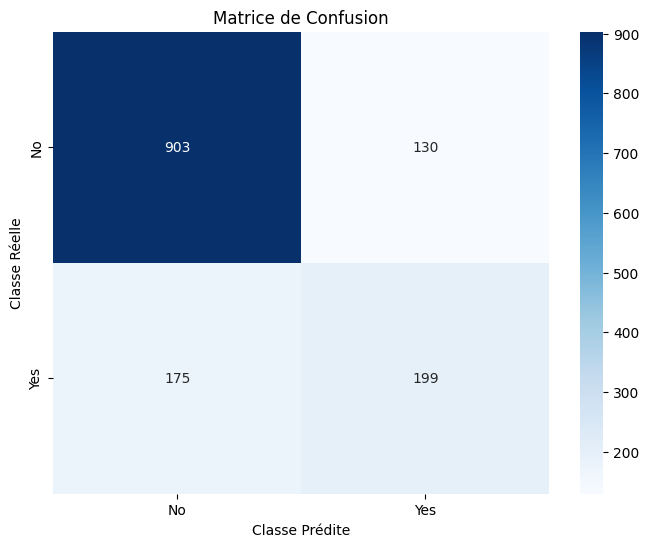

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=df.churn.unique(), yticklabels=df.churn.unique())
plt.title("Matrice de Confusion")
plt.xlabel("Classe Prédite")
plt.ylabel("Classe Réelle")
plt.show()

In [45]:
def build_model(hp):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Input(shape=(X_train.shape[1],)))

    model.add(tf.keras.layers.Dense(
        units=hp.Choice('units1', [8, 16, 32, 64, 128]),
        activation=hp.Choice('activation1', ['relu', 'sigmoid'])
    ))

    model.add(tf.keras.layers.Dense(
        units=hp.Choice('units2', [8, 16, 32, 64, 128]),
        activation=hp.Choice('activation2', ['relu', 'sigmoid'])
    ))

    # Sortie binaire
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

    optimizer_name = hp.Choice('optimizer', ['adam', 'rmsprop'])
    learning_rate = hp.Float('learning_rate', 1e-4, 1e-2, sampling='log')

    if optimizer_name == 'adam':
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    else:
        optimizer = tf.keras.optimizers.RMSprop(learning_rate=learning_rate)

    model.compile(
        optimizer=optimizer,
        loss='binary_crossentropy',
        metrics=[tf.keras.metrics.Recall(name='recall'), tf.keras.metrics.AUC(name='auc')]
    )

    return model


In [46]:
tuner = kt.RandomSearch(
    build_model,
    objective=kt.Objective('val_recall', direction='max'),
    max_trials=100,
    executions_per_trial=1,
    directory='my_dir',
    project_name='churn_gridsearch'
)

early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_recall',
    patience=3,
    restore_best_weights=True
)

tuner.search(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=32,  # A définir ici, pas dans le modèle
    callbacks=[early_stop]
)


Trial 100 Complete [00h 00m 03s]
val_recall: 0.6020066738128662

Best val_recall So Far: 0.7123745679855347
Total elapsed time: 00h 06m 23s


In [52]:
import keras_tuner as kt
import tensorflow as tf
from sklearn.utils import class_weight
import numpy as np

# Conversion de y_train en labels binaires si nécessaire (si c'est en one-hot encoding)
# y_train_labels = np.argmax(y_train, axis=1)  # Convertir les labels en format binaire (0 ou 1)
print(np.unique(y))


# Calcul des poids des classes
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train_labels),
    y=y_train_labels
)
class_weight_dict = dict(enumerate(class_weights))

# Définir un callback EarlyStopping
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_recall',    # Surveille la recall sur la validation
    patience=3,              # Tolère 3 époques sans amélioration
    restore_best_weights=True
)

# Définir la fonction de construction du modèle
def build_model(hp):
    model = tf.keras.Sequential()

    # Entrée
    model.add(tf.keras.layers.Input(shape=(X_train.shape[1],)))

    # Première couche dense
    model.add(tf.keras.layers.Dense(
        hp.Choice('units', [8, 16, 32, 64, 128]),  # Nombre de neurones
        activation=hp.Choice('activation', ['relu', 'sigmoid'])  # Activation
    ))

    # Deuxième couche dense
    model.add(tf.keras.layers.Dense(
        hp.Choice('units2', [8, 16, 32, 64, 128]),  # Nombre de neurones
        activation=hp.Choice('activation2', ['relu','sigmoid'])  # Activation
    ))

    # Couche de sortie (classification binaire)
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))  # Pour classification binaire

    # Taux d'apprentissage comme un hyperparamètre
    learning_rate = hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')

    # Compilation du modèle avec un optimiseur et taux d'apprentissage
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),  # Optimiseur avec taux d'apprentissage
        loss='binary_crossentropy',  # Perte pour la classification binaire
        metrics=[tf.keras.metrics.Recall(), 'AUC']  # Surveille la recall de la classe 1 (churn = "yes")
    )

    model.summary()
    return model

# Définir le tuner
tuner = kt.GridSearch(
    build_model,
    objective='val_recall',  # Objectif à maximiser (val_recall)
    max_trials=100,  # Nombre d'essais du tuner
    directory='my_dir',  # Répertoire pour stocker les résultats
    project_name='churn_gridsearch_cw'  # Nom du projet
)

# Lancer la recherche des hyperparamètres
tuner.search(X_train, y_train, epochs=20, validation_data=(X_val, y_val), callbacks=[early_stop], class_weight=class_weight_dict)

# Afficher les meilleurs hyperparamètres trouvés
best_hyperparameters = tuner.oracle.get_best_trials(num_trials=1)[0].hyperparameters
print("Meilleurs hyperparamètres :", best_hyperparameters.values)


Trial 100 Complete [00h 00m 04s]
val_recall: 0.0

Best val_recall So Far: 1.0
Total elapsed time: 00h 07m 29s
Meilleurs hyperparamètres : {'units': 8, 'activation': 'relu', 'units2': 8, 'activation2': 'sigmoid', 'learning_rate': 0.0001}


In [23]:
np.unique(y_train)

array([0, 1])

In [53]:
# Lancement de la recherche
tuner.search(
    X_train,
    y_train_cat,
    epochs=20,
    validation_data=(X_val, y_val_cat),
    callbacks=[early_stop]
)

tuner.results_summary()

Results summary
Results in my_dir/churn_gridsearch_cw
Showing 10 best trials
Objective(name="val_recall", direction="max")

Trial 011 summary
Hyperparameters:
units: 8
activation: relu
units2: 8
activation2: sigmoid
learning_rate: 0.0001
Score: 1.0

Trial 033 summary
Hyperparameters:
units: 8
activation: relu
units2: 16
activation2: sigmoid
learning_rate: 0.0001
Score: 1.0

Trial 057 summary
Hyperparameters:
units: 8
activation: relu
units2: 32
activation2: sigmoid
learning_rate: 0.000316227766016838
Score: 0.9799330830574036

Trial 060 summary
Hyperparameters:
units: 8
activation: relu
units2: 32
activation2: sigmoid
learning_rate: 0.00019952623149688798
Score: 0.8963210582733154

Trial 005 summary
Hyperparameters:
units: 8
activation: relu
units2: 8
activation2: relu
learning_rate: 0.00019952623149688798
Score: 0.8394649028778076

Trial 055 summary
Hyperparameters:
units: 8
activation: relu
units2: 32
activation2: sigmoid
learning_rate: 0.0001
Score: 0.7324414849281311

Trial 073 sum

### tensor board 

In [55]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [58]:
import os
import datetime

best_hp = tuner.get_best_hyperparameters(1)[0]

best_model = tuner.oracle.get_best_trials(best_hp)

model_ckpt = tf.keras.callbacks.ModelCheckpoint(
    'best_model.keras',
    save_best_only=True,
    monitor='val_recall'
)

log_dir = os.path.join(
    "logs", "fit", datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
)
tensorboard_cb = tf.keras.callbacks.TensorBoard(
    log_dir=log_dir,
    histogram_freq=1,       # enregistre les histogrammes de poids chaque époque
    write_graph=True,       # sauvegarde le graph du modèle
    write_images=True
)

history = model.fit(
    X_train, y_train_cat,
    validation_split=0.2,
    epochs=20,
    batch_size=16,
    verbose=1,
    callbacks=[early_stop, model_ckpt, tensorboard_cb]
)

TypeError: '<' not supported between instances of 'int' and 'HyperParameters'

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test_cat, verbose=0)
print(f"\nAccuracy sur le test set : {test_acc:.4f}")
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
print("\nClassification Report :")
print(classification_report(y_test, y_pred, target_names=df.churn.unique()))
print("Matrice de Confusion :")
cm = confusion_matrix(y_test, y_pred)
print(cm)


Accuracy sur le test set : 0.7854
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 884us/step

Classification Report :
              precision    recall  f1-score   support

          No       0.84      0.87      0.86      1033
         Yes       0.60      0.56      0.58       374

    accuracy                           0.79      1407
   macro avg       0.72      0.71      0.72      1407
weighted avg       0.78      0.79      0.78      1407

Matrice de Confusion :
[[896 137]
 [165 209]]


In [50]:
%tensorboard --logdir logs/fit

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test_cat, verbose=0)
print(f"\nAccuracy sur le test set : {test_acc:.4f}")
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
print("\nClassification Report :")
print(classification_report(y_test, y_pred, target_names=iris.target_names))
print("Matrice de Confusion :")
cm = confusion_matrix(y_test, y_pred)
print(cm)

%tensorboard --logdir logs/fit


UsageError: Line magic function `%tensorboard` not found.
